# Sentinel image preprocessing

*Aim*:
>- creating a `Geotif` file from selected channels 


**Steps**

>- polygon
>- unzip Sentinel-2 data
>- preparation of the `polygon`
>- channel selection
>- resampling
>- trimming (clipping) images
>- save data

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import rasterio
from pathlib import Path
import zipfile
from shapely import geometry
import os, sys, re

In [2]:
%cd /home/u1/22_dydaktyka/05imProc/rok2021

[WinError 2] Le fichier spécifié est introuvable: '/home/u1/22_dydaktyka/05imProc/rok2021'
D:\Cours_Centrale\cours_S8_Pologne\python_image_processing\project


In [3]:
%ls ../img_test/

Option non valide - "img_test".


# Polygon

>Copy the coordinates of the novel polygon from previous classes (sentinel1.ipynb) 

In [4]:

cordsUtm = [(437428.46, 5426728.41), (467428.46, 5426728.41), (467428.46, 5396728.41), (437428.46, 5396728.41)]
cordsUtm

[(437428.46, 5426728.41),
 (467428.46, 5426728.41),
 (467428.46, 5396728.41),
 (437428.46, 5396728.41)]

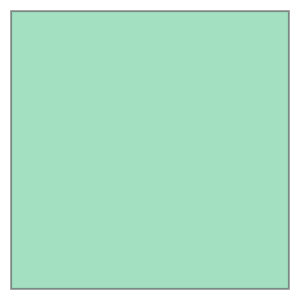

In [5]:
poly = geometry.asPolygon(cordsUtm)
poly

# Unzip

>- `zipfile` module — work with ZIP archives
>- [zipfile documentation](https://docs.python.org/3/library/zipfile.html)

In [7]:
zipName = 'downloaded_images/S2B_MSIL1C_20210530T104619_N0300_R051_T31UDQ_20210530T115735.zip'

In [8]:
with zipfile.ZipFile(zipName,"r") as fz:
    print('Files in zip: ',len(fz.filelist))
    fz.extractall('downloaded_images/')

Files in zip:  104


In [8]:
%ls downloaded_images/

cameraman.tif
L2A_20200412_T34UDA_cliped.tif
lena_color_512.tif
lena_gray_512.tif
peppers_color.jpg
S2B_MSIL2A_20210326T100029_N0214_R122_T33UXV_20210326T124311.SAFE/
S2L2A_20210326T33UXV/
sent.jpg
swornegacie/


# Short name

In [9]:
old = Path('downloaded_images/S2B_MSIL1C_20210530T104619_N0300_R051_T31UDQ_20210530T115735.SAFE/')
old

WindowsPath('downloaded_images/S2B_MSIL1C_20210530T104619_N0300_R051_T31UDQ_20210530T115735.SAFE')

In [30]:
new = Path('downloaded_images/S2L2A_20210530T31UDQ')

if not new.is_dir():
    old.rename(new)

In [11]:
%ls downloaded_images/S2L2A_20210705T31UDQ/GRANULE/L2A_T33UXV_A021169_20210326T100025/IMG_DATA/

R10m/  R20m/  R60m/


# Image selecting

In [6]:
folder = Path('downloaded_images/S2L2A_20210530T31UDQ/GRANULE/L1C_T31UDQ_A022099_20210530T104621/IMG_DATA/')
folder

WindowsPath('downloaded_images/S2L2A_20210530T31UDQ/GRANULE/L1C_T31UDQ_A022099_20210530T104621/IMG_DATA')

In [7]:
for f in folder.glob('*/*B*'):
    print(f.name)

T31UDQ_20210530T104619_B02_10m.jp2
T31UDQ_20210530T104619_B03_10m.jp2
T31UDQ_20210530T104619_B04_10m.jp2
T31UDQ_20210530T104619_B08_10m.jp2
T31UDQ_20210530T104619_B05_20m.jp2
T31UDQ_20210530T104619_B06_20m.jp2
T31UDQ_20210530T104619_B07_20m.jp2
T31UDQ_20210530T104619_B11_20m.jp2
T31UDQ_20210530T104619_B12_20m.jp2
T31UDQ_20210530T104619_B01_60m.jp2
T31UDQ_20210530T104619_B09_60m.jp2
T31UDQ_20210530T104619_B10_60m.jp2


In [8]:
bands = []
for f in folder.glob('*/*B*'):
    #print(re.search(r'(B.{2}).*(\d\d)',f.name).groups())
    tmp = list(re.search(r'(B.{2})_{1}(\d\d)',f.name).groups())
    
    tmp.append(f.as_posix())
    #print(tmp)
    bands.append(tmp)
    
    
df = pd.DataFrame(bands,columns=['name','resolu','add'])
df

,name,resolu,add
0,B02,10,downloaded_images/S2L2A_20210530T31UDQ/GRANULE...
1,B03,10,downloaded_images/S2L2A_20210530T31UDQ/GRANULE...
2,B04,10,downloaded_images/S2L2A_20210530T31UDQ/GRANULE...
3,B08,10,downloaded_images/S2L2A_20210530T31UDQ/GRANULE...
4,B05,20,downloaded_images/S2L2A_20210530T31UDQ/GRANULE...
5,B06,20,downloaded_images/S2L2A_20210530T31UDQ/GRANULE...
6,B07,20,downloaded_images/S2L2A_20210530T31UDQ/GRANULE...
7,B11,20,downloaded_images/S2L2A_20210530T31UDQ/GRANULE...
8,B12,20,downloaded_images/S2L2A_20210530T31UDQ/GRANULE...
9,B01,60,downloaded_images/S2L2A_20210530T31UDQ/GRANULE...


In [9]:
df = df.groupby('name').min()
df

,resolu,add
name,,
B01,60,downloaded_images/S2L2A_20210530T31UDQ/GRANULE...
B02,10,downloaded_images/S2L2A_20210530T31UDQ/GRANULE...
B03,10,downloaded_images/S2L2A_20210530T31UDQ/GRANULE...
B04,10,downloaded_images/S2L2A_20210530T31UDQ/GRANULE...
B05,20,downloaded_images/S2L2A_20210530T31UDQ/GRANULE...
B06,20,downloaded_images/S2L2A_20210530T31UDQ/GRANULE...
B07,20,downloaded_images/S2L2A_20210530T31UDQ/GRANULE...
B08,10,downloaded_images/S2L2A_20210530T31UDQ/GRANULE...
B09,60,downloaded_images/S2L2A_20210530T31UDQ/GRANULE...


# Show some img

## Single channel with polygon

In [10]:
x,y = poly.boundary.coords.xy
print(x,y,sep='\n\n')

array('d', [437428.46, 467428.46, 467428.46, 437428.46, 437428.46])

array('d', [5426728.41, 5426728.41, 5396728.41, 5396728.41, 5426728.41])


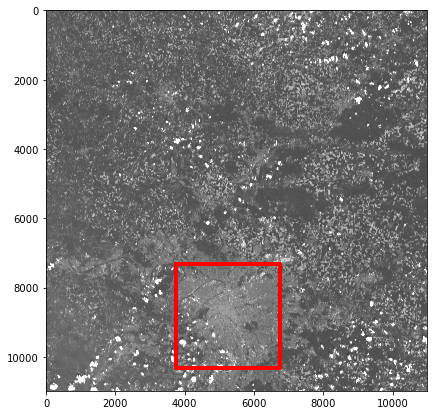

In [11]:
fg = plt.figure(figsize=(7,7))
with rasterio.open(df.iloc[1,-1]) as src:
    ar = src.read(1)
    
    # convert UTM coordinates to rows and cols of numpy array 
    afine = src.transform
    cols,rows = rasterio.transform.rowcol(afine,x,y)

plt.imshow(ar,vmax=2500,cmap='gray');
plt.plot(rows,cols,'-',lw=4,c='r');

## Histograms

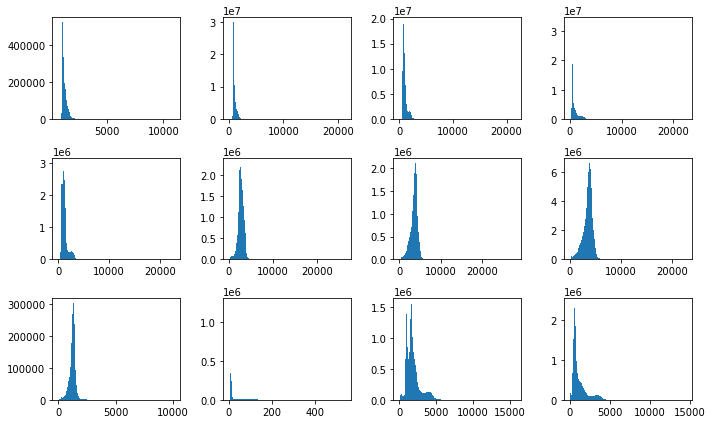

In [21]:
f,axs = plt.subplots(3,4,figsize=(10,6))


for i,ax in enumerate(axs.ravel()):
    tmpAdd = df.iloc[i,-1]
    with rasterio.open(tmpAdd) as fm:
        im = fm.read(1)
    ax.hist(im.ravel(),bins=256)
        
plt.tight_layout()       
        

## Selected channels 

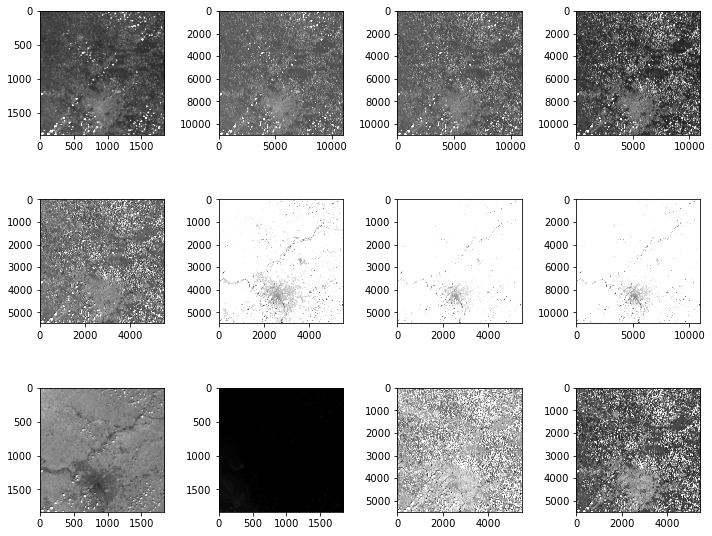

In [22]:
f,axs = plt.subplots(3,4,figsize=(10,8))


for i,ax in enumerate(axs.ravel()):
    tmpAdd = df.iloc[i,-1]
    with rasterio.open(tmpAdd) as fm:
        im = fm.read(1)
    ax.imshow(im,cmap='gray',vmax=2500)
        
plt.tight_layout()       
        

# Resampling & clipping

## Out Folder

>If there is no folder to write an output image - create it.

In [12]:
outFold = Path('downloaded_images/paris/')
if not outFold.is_dir():
    outFold.mkdir()

## Import modules

In [13]:
from rasterio.enums import Resampling
from rasterio import mask
from rasterio.io import MemoryFile

## Set metadata
The channel metadata with the highest resolution will be used when resampling other channels. Updates meta:
>- `GTiff` - out driver
>- `nodata` - set to max value for 12 bits image ($2^{12}$)
>- `count` - noumber of bands

In addition to metadata, define arguments `outShape` and `metaTmp`, which will be used when resampling and save data to a temporary file. 

In [14]:
df.iloc[0,-1]

'downloaded_images/S2L2A_20210530T31UDQ/GRANULE/L1C_T31UDQ_A022099_20210530T104621/IMG_DATA/R60m/T31UDQ_20210530T104619_B01_60m.jp2'

In [15]:
with rasterio.open(df.iloc[0,-1]) as fm:
    print(fm.meta)

{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 1830, 'height': 1830, 'count': 1, 'crs': CRS.from_epsg(32631), 'transform': Affine(60.0, 0.0, 399960.0,
       0.0, -60.0, 5500020.0)}


In [16]:
df.iloc[1,-1]

'downloaded_images/S2L2A_20210530T31UDQ/GRANULE/L1C_T31UDQ_A022099_20210530T104621/IMG_DATA/R10m/T31UDQ_20210530T104619_B02_10m.jp2'

In [17]:
metaOut = None
metaTmp = None

with rasterio.open(df.iloc[1,-1]) as src: 
    metaOut = src.meta
    metaOut['driver'] = 'GTiff'
    metaOut['nodata'] = 2**12
    metaOut['count'] = df.shape[0]
                
    metaTmp = src.meta
    metaTmp['count'] = 1
    
    outShape = (metaOut['height'],metaOut['width'])
    
metaOut

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 4096,
 'width': 10980,
 'height': 10980,
 'count': 12,
 'crs': CRS.from_epsg(32631),
 'transform': Affine(10.0, 0.0, 399960.0,
        0.0, -10.0, 5500020.0)}

## Resampling/clipping

In [18]:
outData = []


for i in range(df.shape[0]):
    add = df.iloc[i,1]
    
    with rasterio.open(add) as src:                 
        if int(df.iloc[i,0]) > 10:
            data = src.read(1,out_shape = outShape, resampling = Resampling.nearest)
        else:
            data = src.read(1)
    #print(data.shape)

        
    with MemoryFile() as memfile:
        with memfile.open(**metaTmp) as dataset:
            dataset.write(data,1)
            out_image, out_transform = mask.mask(dataset, [poly], crop=True)
            out_image = np.transpose(out_image,(1,2,0))
            out_image = out_image[:,:,0].copy()
            outData.append(out_image)
            print(out_image.shape, df.iloc[i,0],df.index[i])
        
metaOut.update({"height": out_image.shape[0],
                 "width": out_image.shape[1],
                 "transform": out_transform})
    

(3001, 3001) 60 B01
(3001, 3001) 10 B02
(3001, 3001) 10 B03
(3001, 3001) 10 B04
(3001, 3001) 20 B05
(3001, 3001) 20 B06
(3001, 3001) 20 B07
(3001, 3001) 10 B08
(3001, 3001) 60 B09
(3001, 3001) 60 B10
(3001, 3001) 20 B11
(3001, 3001) 20 B12


In [19]:
len(outData)

12

In [20]:
df.index

Index(['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10',
       'B11', 'B12'],
      dtype='object', name='name')

# Save geoTiff

In [23]:
dst_addres = 'downloaded_images/paris/readyImage2.tif'

with rasterio.open(dst_addres,'w',**metaOut) as dst:
    for i,ar in enumerate(outData,1):
        dst.write(ar,i)
        dst.set_band_description(i,df.index[i-1])